<a href="https://colab.research.google.com/github/Madhavmurari/Pytorch-Learning/blob/main/01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch_Workflow

The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discovered patterns to predict the future.<br>
There are many ways to do this and many new ways are being discovered all the time.<br>
And we see if we can build a PyTorch model that learns the pattern of the straight line and matches it.

In [72]:
#Let's start by putting what we're covering into a dictionary to reference later.
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}


And now let's import what we'll need for this module.

We're going to get `torch`, `torch.nn` (`nn` stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [73]:
import torch
from torch import nn  #nn contains all Pytorch's building Block for entire Neural Network
import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cu121'

## Data(Preparing and loading)
Machine learning is a game of two parts:

* Turn your data, whatever it is, into numbers (a representation).
* Pick or build a model to learn the representation as best as possible.
Sometimes one and two can be done at the same time.

But what if you don't have data?

Well, that's where we're at now.

No data.

But we can create some.

Let's create our data as a straight line.

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).



In [74]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now we are going to build model to predict the relationship between X(feature) and y(labels)

**Split data into training and test sets**

In [75]:
#Create tarin and test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Lets visualise it.

In [76]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8, 6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=8, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 10});

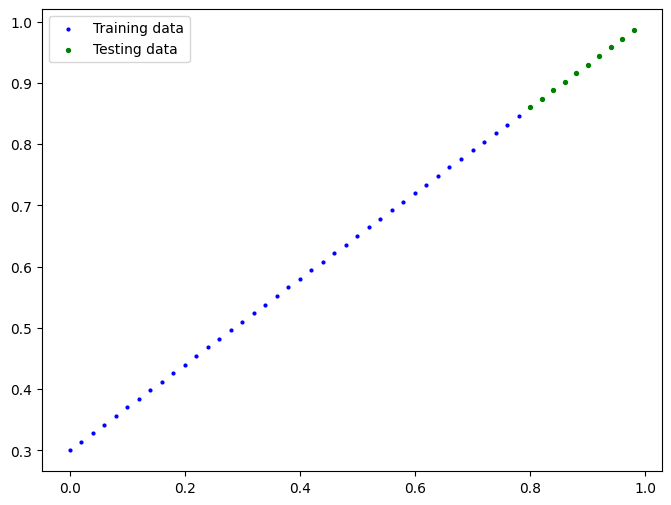

In [77]:
plot_predictions()

##Build Model
Let's replicate a standard linear regression model using pure PyTorch.

In [78]:
#Lets create Linear Regresion model Class
class LinearRegressionModel(nn.Module):# <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                           dtype=torch.float,
                                          requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
  # Forward defines the computation in the model
  def forward(self,x:torch.tensor)->torch.tensor:  # <- "x" is the input data (e.g. training/testing features)
    return self.weights*x + self.bias              # <- this is the linear regression formula (y = m*x + b)




### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

### Checking the content of our pytorch model
So we can check our model parameter or What's inside our model using `parameter()`


In [79]:
#create an random seed
torch.manual_seed(42)

# Creating an instance of model
model_0=LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [80]:
#List named Parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [81]:
#Make Prediction with model
with torch.inference_mode():
  y_preds=model_0(X_test)

#we can use torch.no_grad but inference_mode is torch.prefered(it reduces the calculation overhead )
# with torch.no_grad():
#   y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [82]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

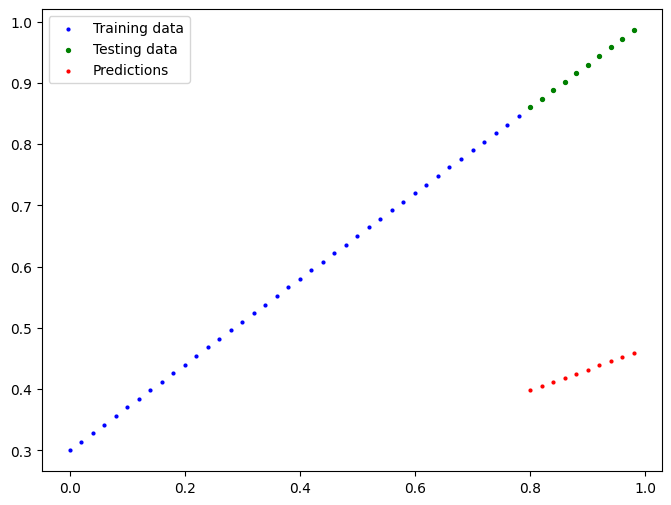

In [83]:
plot_predictions(predictions=y_preds)

### Train Model

The whole idea of model training is to better representation of unknown parameter to known parameter.
<br>
One way to measure how poor or how wrong our model to predictions are is use loss function.
<br>
* **Note:**it is useful to remember that loss function typically refers to an individual error, while cost function refers to the aggregate error across multiple data points.<br>

Things we need to train:
* **Loss Function:**A function is to measure the how wrong the prediction are to the ideal outputs.
* **Optimizer:**Takes into account the loss fuction of the model and and adjuct the model's parameter(e.g. weight & bias) to improve the loss function.

<br>
for pytorch we need:
* A training loop
* A testing loop

In [84]:
#set up loss function
loss_fn=nn.L1Loss()

#Set up Optimizer(Stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.001)
#lr=learning rate ->A most important hyperparameter that can be set
# A parameter is value that model set itself


### Building a training (and testing) loop in

**PyTorch training loop**<br>
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)



In [85]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [86]:
#An epoch is one loop through data
torch.manual_seed(42)
epochs=200

epoch_count=[]
training_loss=[]
testing_loss=[]



### Training
# 0.Loop through data
for epoch in range(epochs):
  #Set the model in training mode
  model_0.train()

  # 1.Forward Pass
  y_pred=model_0(X_train)

  # 2.Calculate the loss
  loss=loss_fn(y_pred,y_train)


  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4.Perform Back propogation on loss with respect to parameter of the model
  loss.backward()

  #Step the optimiser
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    #1.Do the forward pass
    test_pred=model_0(X_test)

    #2.Calculate the loss
  test_loss=loss_fn(test_pred,y_test)

    #Print out what happen in
  if epoch % 10==0:

    epoch_count.append(epoch)
    training_loss.append(loss.detach().numpy())
    testing_loss.append(test_loss.detach().numpy())

    print(f"Epoch:{epoch}|Loss:{loss}|Test loss:{test_loss}")
    #Print out model's state dictionary
    print(model_0.state_dict())





Epoch:0|Loss:0.31288138031959534|Test loss:0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch:10|Loss:0.3013603389263153|Test loss:0.4797181189060211
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
Epoch:20|Loss:0.28983938694000244|Test loss:0.4662471413612366
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
Epoch:30|Loss:0.2783183455467224|Test loss:0.4527761936187744
OrderedDict([('weights', tensor([0.3488])), ('bias', tensor([0.1598]))])
Epoch:40|Loss:0.26679736375808716|Test loss:0.43930521607398987
OrderedDict([('weights', tensor([0.3527])), ('bias', tensor([0.1698]))])
Epoch:50|Loss:0.2552763819694519|Test loss:0.4258342385292053
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])
Epoch:60|Loss:0.24375538527965546|Test loss:0.41236335039138794
OrderedDict([('weights', tensor([0.3605])), ('bias', tensor([0.1898]))])
Epoch:70|Loss:0.232234388589859|Test loss:0.398892

In [87]:
with torch.inference_mode():
  y_pred_new=model_0(X_test)

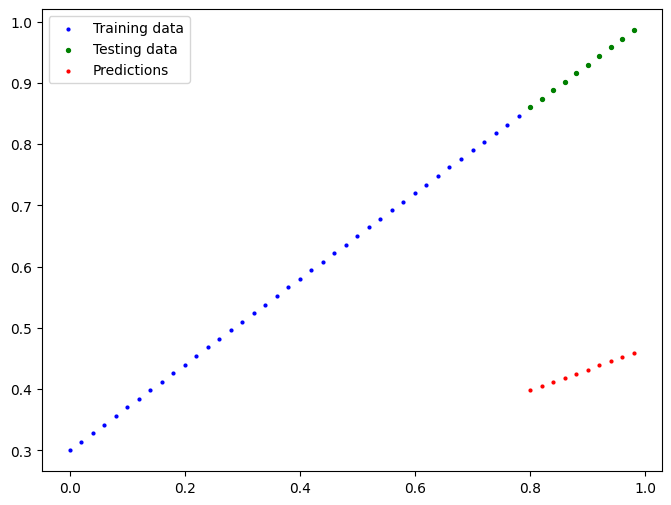

In [88]:
plot_predictions(predictions=y_preds)

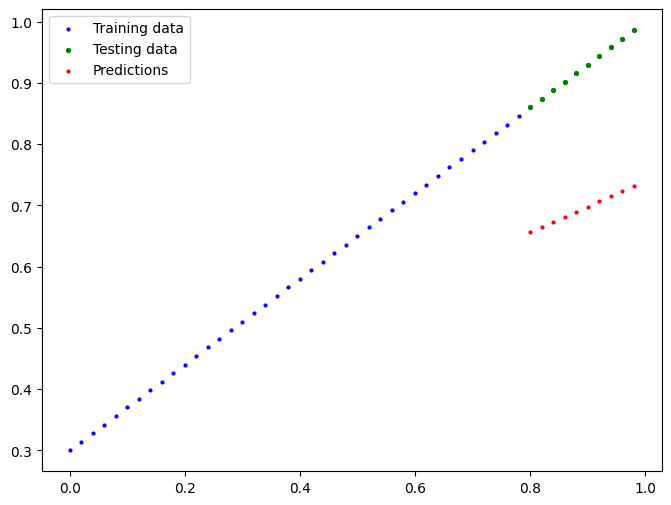

In [89]:
plot_predictions(predictions=y_pred_new)

In [90]:
epoch_count,training_loss,testing_loss

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [array(0.31288138, dtype=float32),
  array(0.30136034, dtype=float32),
  array(0.2898394, dtype=float32),
  array(0.27831835, dtype=float32),
  array(0.26679736, dtype=float32),
  array(0.25527638, dtype=float32),
  array(0.24375539, dtype=float32),
  array(0.23223439, dtype=float32),
  array(0.2207134, dtype=float32),
  array(0.2091924, dtype=float32),
  array(0.19767141, dtype=float32),
  array(0.1861504, dtype=float32),
  array(0.17462942, dtype=float32),
  array(0.16310856, dtype=float32),
  array(0.15158771, dtype=float32),
  array(0.14006686, dtype=float32),
  array(0.12854603, dtype=float32),
  array(0.11702518, dtype=float32),
  array(0.10654274, dtype=float32),
  array(0.09747618, dtype=float32)],
 [array(0.49318904, dtype=float32),
  array(0.47971812, dtype=float32),
  array(0.46624714, dtype=float32),
  array(0.4527762, dtype=float32),
  array(0.

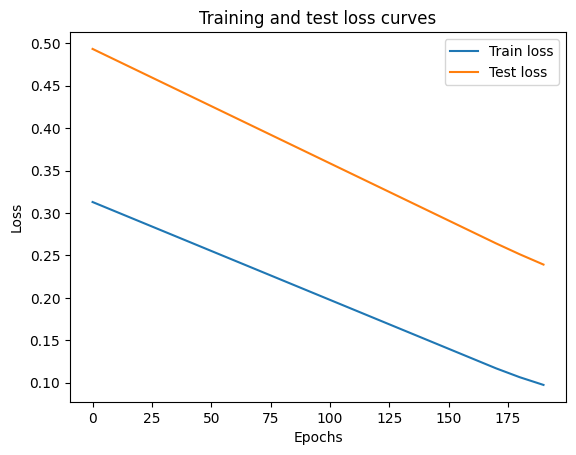

In [91]:
# Plot the loss curves
plt.plot(epoch_count, training_loss, label="Train loss")
plt.plot(epoch_count, testing_loss, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [92]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Saving a model in Pytorch

There are three main method for model saving and loading.
* `torch.save()`- Allow to save pytorch object in python's pickle format.
* `torch.load()`- Allow to load a saved pytoch object
* `torch.Module.load_state_dict()`- Allow to load a model's saved state dictionary.

In [93]:
# Saving Our Pytorch Model
from pathlib import Path

#1. Create models directory
Model_Path = Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)

#2. Create model save path
Model_Name = "01_Pytorch_Workflow_model_0.pth"
Model_Save_Path = Model_Path / Model_Name

#3. Save the model state dictionary
print(f"Saving Model to:{Model_Save_Path}")
torch.save(obj=model_0.state_dict(),f=Model_Save_Path)

Saving Model to:models/01_Pytorch_Workflow_model_0.pth


In [94]:
!ls -l models


total 4
-rw-r--r-- 1 root root 1680 Sep 28 02:42 01_Pytorch_Workflow_model_0.pth


## Loading a Pytorch model
Since we saved our model's `state_dict()` rather than entire model,we will create a new instance of our model class and load the saed `state_dict()` into that.

In [95]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [96]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

# Load the saved state_dict of model_0 (This will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=Model_Save_Path,weights_only=True))

<All keys matched successfully>

In [97]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [98]:
# Make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds= loaded_model_0(X_test)
loaded_model_preds

tensor([[0.6566],
        [0.6649],
        [0.6732],
        [0.6815],
        [0.6898],
        [0.6981],
        [0.7064],
        [0.7147],
        [0.7230],
        [0.7313]])

In [99]:
# Make some models prediction
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.6566],
        [0.6649],
        [0.6732],
        [0.6815],
        [0.6898],
        [0.6981],
        [0.7064],
        [0.7147],
        [0.7230],
        [0.7313]])

In [100]:
#Compare loaded model preds with original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together
lets go backmthrough the steps above and see it all in one place

In [5]:
# Import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check the version of pytorch
torch.__version__

'2.4.1+cu121'

Create device-agnostic code.

This means if we have got access to a GPU, our code will use it.(Potentially faster computing).

If no GPU available then by default our code will use CPU.

In [6]:
# Set up device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


In [7]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 1. Data

In [8]:
# Create some data using linear regression formula y = weight*x + bias
weight=0.5
bias=0.2

#create the range value
start=0
end=1
steps=0.02

# create x,y
X=torch.arange(start,end,steps).unsqueeze(dim=1)
y = weight*X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900]]))

In [9]:
#split data
split=int(0.8*len(X))
X_train,y_train = X[:split],y[:split]
X_test,y_test=X[split:],y[split:]

len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(8, 6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=8, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 10});

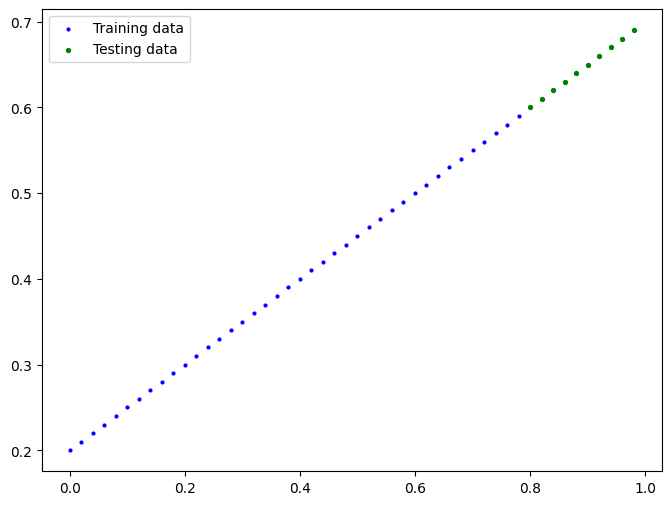

In [11]:
#Plot the data
#Note-If you don't have the plot_prediction() ,it will cause an error
plot_predictions(X_train,y_train,X_test,y_test)

### 2. Building a pytorch Linear regression Model

In [12]:
# Create a linear model by subclass nn.Module
class LinearRegressionModel_v2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear to initialise the parameter
    # also called : linear transform, probing layer, Dense layer, Fully connected layer
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModel_v2()
model_1,model_1.state_dict()

(LinearRegressionModel_v2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [13]:
X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400]]))

In [14]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [15]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 3. Training
For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop



In [16]:
# set up loss function
loss_fn=nn.L1Loss   # same as MAE

# Set up Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.001)


In [18]:
### Set up Training loop
torch.manual_seed(42)

X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)


epochs=200
for epoch in range(epochs):

  model_1.train()

  # 1. Forward pass
  y_pred=model_1(X_train)


  # 2. Calculate Loss
  train_loss=loss_fn(y_pred,y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropogation
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Set up Testing Loop

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)

  test_loss=loss_fn(test_pred,y_test)

  # Print out what's happening
  if epoch %10==0:
    print(f"Epoch:{epoch} | Training Loss: {train_loss} | Test Loss : {test_loss}")




RuntimeError: Boolean value of Tensor with more than one value is ambiguous